1. Require Libraries

In [30]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

2. Load Dataset

We use the sample user behaviors to do exploratory data analysis. 

In [31]:
df = pd.read_csv("Sampled_UserBehavior.csv")

In [32]:
column_names = ['User_ID', 'Item_ID', 'Categorical_ID','Behavior','Timestamp']
df = pd.read_csv("Sampled_UserBehavior.csv", header=0, names=column_names)
df.head()

,User_ID,Item_ID,Categorical_ID,Behavior,Timestamp
1792,1000061,1288773,1735195,pv,1511576626
1793,1000061,4074215,4684862,pv,1511677113
1794,1000061,1120968,512076,pv,1511685194
1795,1000061,4862918,3164550,cart,1511686985
1796,1000061,3150019,3164550,cart,1511687015


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998586 entries, 1792 to 100148375
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   User_ID         998586 non-null  int64 
 1   Item_ID         998586 non-null  int64 
 2   Categorical_ID  998586 non-null  int64 
 3   Behavior        998586 non-null  object
 4   Timestamp       998586 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 45.7+ MB


3. Check Data Integrity

1) We first check if there exists any duplicated rows.

In [34]:
duplicate_rows = df[df.duplicated()]
duplicate_rows_count = duplicate_rows.shape[0]

In [35]:
print(duplicate_rows)
print("Number of duplicated rows:", duplicate_rows_count)

Empty DataFrame
Columns: [User_ID, Item_ID, Categorical_ID, Behavior, Timestamp]
Index: []
Number of duplicated rows: 0


There is no duplicate rows. 

Check whether there are any duplicated columns.

2) Then, we check whether there are any missing values in the dataset. 

In [36]:
df.isnull().sum()

User_ID           0
Item_ID           0
Categorical_ID    0
Behavior          0
Timestamp         0
dtype: int64

There is no missing value in this dataset. 

4.Timestamp to Date

We convert the Timestamp to a time unit -- Date.

In [37]:
df['Date'] = pd.to_datetime(df['Timestamp'], unit='s').dt.date

In [38]:
# Print the count of each unique date
print(df["Date"].value_counts())

2017-12-02    139670
2017-12-03    122451
2017-12-01    112001
2017-11-26    105262
2017-11-30    105068
2017-11-25    102365
2017-11-29    100395
2017-11-28     99709
2017-11-27     99069
2017-11-24     12447
2017-11-23        62
2017-11-18        25
2017-11-22        17
2019-11-01        14
2017-11-16         5
2017-11-19         5
2017-11-21         4
2017-11-11         3
2017-11-12         2
2017-11-14         2
2017-11-20         2
2017-10-21         2
2017-10-29         1
2017-11-10         1
2017-11-15         1
2017-11-13         1
2017-11-02         1
2017-11-05         1
Name: Date, dtype: int64


In [39]:
# Filter the DataFrame for the specific date range
cleaned_df = df[(df["Date"] >= pd.to_datetime('2017-11-25').date()) & (df["Date"] <= pd.to_datetime('2017-12-03').date())]

# Print the count of each unique date in the filtered DataFrame
print(cleaned_df["Date"].value_counts())

2017-12-02    139670
2017-12-03    122451
2017-12-01    112001
2017-11-26    105262
2017-11-30    105068
2017-11-25    102365
2017-11-29    100395
2017-11-28     99709
2017-11-27     99069
Name: Date, dtype: int64


In [40]:
cleaned_df.index = range(1, len(cleaned_df)+1)

In [41]:
cleaned_df.to_csv("Sampled_UserBehavior_cleaned.csv")

5. Check the dimensions of the data.

In [42]:
df = cleaned_df

In [43]:
df

,User_ID,Item_ID,Categorical_ID,Behavior,Timestamp,Date
1,1000061,1288773,1735195,pv,1511576626,2017-11-25
2,1000061,4074215,4684862,pv,1511677113,2017-11-26
3,1000061,1120968,512076,pv,1511685194,2017-11-26
4,1000061,4862918,3164550,cart,1511686985,2017-11-26
5,1000061,3150019,3164550,cart,1511687015,2017-11-26
...,...,...,...,...,...,...
985986,999949,2652397,2355072,pv,1512268408,2017-12-03
985987,999949,694434,2355072,pv,1512268415,2017-12-03
985988,999949,552658,737184,pv,1512268526,2017-12-03
985989,999949,4016076,1521931,pv,1512274117,2017-12-03


In [14]:
np.shape(df)

(985990, 6)

6. Check the number of unique values of each column in the dataset. 

In [15]:
unique_counts = df.nunique()

In [16]:
unique_counts

User_ID             9820
Item_ID           396855
Categorical_ID      5843
Behavior               4
Timestamp         488038
Date                   9
dtype: int64

7. Check the number of different types of behaviors.

In [17]:
from collections import Counter
print(Counter(df['Behavior']))

Counter({'pv': 882949, 'cart': 55229, 'fav': 28407, 'buy': 19405})


The dataset contains all behaviors(including Page Views, Cart, Favorite, Purchases) of 9840 random users who were active between November 25, 2017, and December 3, 2017. Each row in the dataset represents a single user action and consist of the User ID, Item ID, Category ID, Behavior, and Timestamp. 

8. Variable Frequency Distribution

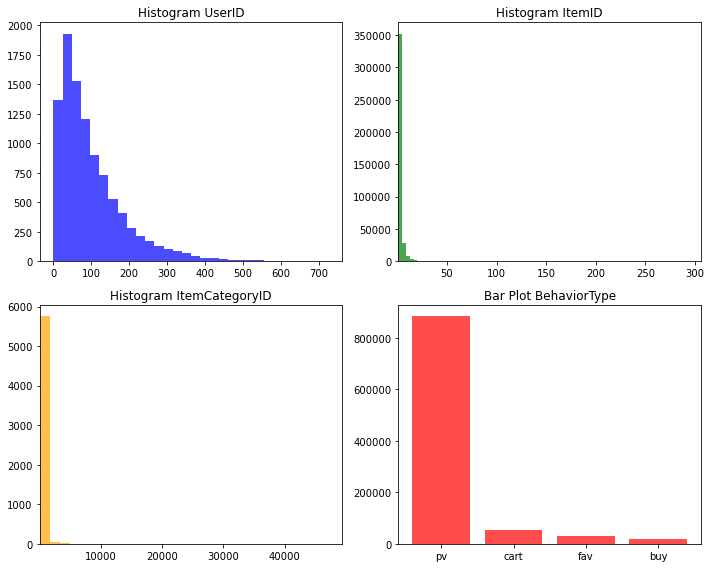

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Counting the occurrences of each behavior type
behavior_counts = df["Behavior"].value_counts()

# Plot histograms of counts of unique values for each column
axs[0, 0].hist(df["User_ID"].value_counts(), bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title('Histogram UserID')

axs[0, 1].hist(df["Item_ID"].value_counts(), bins=80, color='green', alpha=0.7)
axs[0, 1].set_title('Histogram ItemID')
axs[0, 1].set_xlim([df["Item_ID"].value_counts().min(), df["Item_ID"].value_counts().max()])

axs[1, 0].hist(df["Categorical_ID"].value_counts(), bins=30, color='orange',alpha=0.7)
axs[1, 0].set_title('Histogram ItemCategoryID')
axs[1, 0].set_xlim([df["Categorical_ID"].value_counts().min(), df["Categorical_ID"].value_counts().max()])

# Bar plot for Behavior type
axs[1, 1].bar(behavior_counts.index, behavior_counts.values, color='red', alpha=0.7)
axs[1, 1].set_title('Bar Plot BehaviorType')

plt.tight_layout()

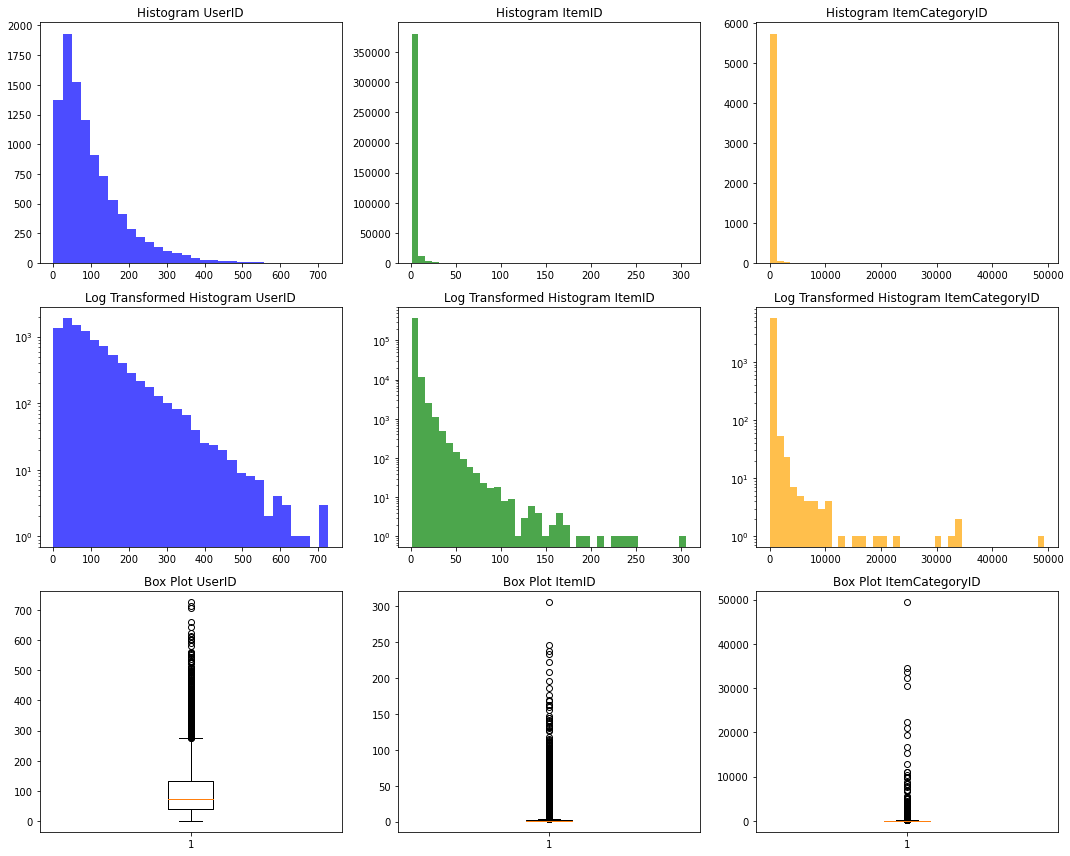

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

# Histogram
axs[0, 0].hist(df["User_ID"].value_counts(), bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title('Histogram UserID')

axs[0, 1].hist(df["Item_ID"].value_counts(), bins=40, color='green', alpha=0.7)
axs[0, 1].set_title('Histogram ItemID')

axs[0, 2].hist(df["Categorical_ID"].value_counts(), bins=40, color='orange', alpha=0.7)
axs[0, 2].set_title('Histogram ItemCategoryID')

# Box Plots
axs[1, 0].hist(df["User_ID"].value_counts(), bins=30, color='blue', alpha=0.7, log=True)
axs[1, 0].set_title('Log Transformed Histogram UserID')

axs[1, 1].hist(df["Item_ID"].value_counts(), bins=40, color='green', alpha=0.7, log=True)
axs[1, 1].set_title('Log Transformed Histogram ItemID')

axs[1, 2].hist(df["Categorical_ID"].value_counts(), bins=40, color='orange', alpha=0.7, log=True)
axs[1, 2].set_title('Log Transformed Histogram ItemCategoryID')

# Histograms with Logarithmic Transformation
axs[2, 0].boxplot(df["User_ID"].value_counts())
axs[2, 0].set_title('Box Plot UserID')

axs[2, 1].boxplot(df["Item_ID"].value_counts())
axs[2, 1].set_title('Box Plot ItemID')

axs[2, 2].boxplot(df["Categorical_ID"].value_counts())
axs[2, 2].set_title('Box Plot ItemCategoryID')

plt.tight_layout()
plt.show()


9. Check the number of different behaviors in each date.

In [ ]:
df['Behavior1']=df['Behavior'].map({'pv':1,'cart':2,'fav':3,'buy':4})
df['Behavior1']=df['Behavior1'].apply(lambda x: list(str(x)))
a = df.groupby('Date')['Behavior1'].sum()
a = pd.DataFrame(a)
a

In [ ]:
print(Counter(a['Behavior1'].iloc[0]))

In [ ]:
#获取'pv','fav','cart','buy'数据
item = pd.DataFrame(columns=['pv','fav','cart','buy'],index=['12/1','12/2','12/3','11/25','11/26','11/27','11/28','11/29','11/30'])
for i in range(9):
    x = Counter(a['Behavior1'].iloc[i])
    it = list(x.values())
    item.iloc[i] = it
        
item

10.1 Check the number of user-item pairs with deplicated behaviors. 

In [21]:
#df_drop = df.drop(["Timestamp", "Date","Behavior1"],axis=1)
#duplicate_rows_drop = df_drop[df_drop.duplicated()]
#duplicate_rows_count_drop = duplicate_rows_drop.shape[0]
#print("Total number of rows:", df_drop.shape[0])
#print("Number of user-item pairs with duplicated behaviors:", duplicate_rows_count_drop)

10.2 Check the number of user-item pairs with specific behaviors.

In [ ]:
from collections import Counter
print(Counter(duplicate_rows_drop['Behavior']))

We can see that customers are likely to click on an item multiples times.

In [ ]:
# Counting the frequency of each duplicate row
frequency = duplicate_rows_drop.groupby(list(df_drop.columns)).size()

# Getting the maximum number of duplicates
max_duplicates = frequency.max()

print("Maximum number of user-item pair duplicate behaviors:", max_duplicates)

11. Data pivoting

In [22]:
df = pd.read_csv('Sampled_UserBehavior_cleaned.csv').iloc[:, 1:]
def data_pivot(df):
    # df = pd.read_csv('../data/UserBehavior10000.csv').iloc[:, 1:]
    df = df.drop("Date",axis=1)
    df.columns = ['UserID', 'ItemID', 'ItemCategoryID', 'BehaviorType', 'TimeStamp']

    # Pivot by behavior type, but dropping timestamp
    pivot_df = pd.pivot_table(df, values='BehaviorType', index=['UserID', 'ItemID', 'ItemCategoryID'], columns='BehaviorType', aggfunc='any')
    pivot_df.reset_index(inplace=True)
    return pivot_df

In [23]:
pivot_df = data_pivot(df)

In [24]:
df = pivot_df
df

BehaviorType,UserID,ItemID,ItemCategoryID,buy,cart,fav,pv
0,253,137988,2409937,NaN,NaN,NaN,True
1,253,257634,2885642,NaN,NaN,NaN,True
2,253,500819,2409937,NaN,NaN,NaN,True
3,253,543072,2885642,NaN,NaN,NaN,True
4,253,937072,2885642,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...
746367,1017952,4011217,3422001,NaN,NaN,NaN,True
746368,1017952,4183961,4159072,NaN,NaN,NaN,True
746369,1017952,4490910,411153,NaN,NaN,NaN,True
746370,1017952,4501732,1573426,NaN,NaN,NaN,True


In [25]:
df.fillna(0, inplace=True)
df.replace(True,1)

BehaviorType,UserID,ItemID,ItemCategoryID,buy,cart,fav,pv
0,253,137988,2409937,0,0,0,1
1,253,257634,2885642,0,0,0,1
2,253,500819,2409937,0,0,0,1
3,253,543072,2885642,0,0,0,1
4,253,937072,2885642,0,0,0,1
...,...,...,...,...,...,...,...
746367,1017952,4011217,3422001,0,0,0,1
746368,1017952,4183961,4159072,0,0,0,1
746369,1017952,4490910,411153,0,0,0,1
746370,1017952,4501732,1573426,0,0,0,1


12.Shows the relationship between User-Item Pairs Behaviors and Purchase Outcomes:

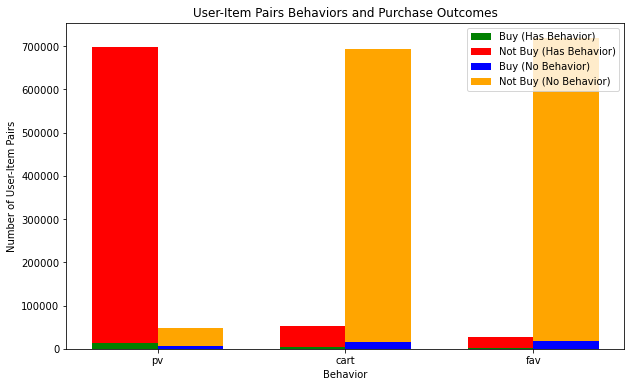

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# Aggregating data
behaviors = ['pv', 'cart', 'fav']
results = pd.DataFrame(index=behaviors, columns=['Buy (Has Behavior)', 'Not Buy (Has Behavior)', 'Buy (No Behavior)', 'Not Buy (No Behavior)'])

for behavior in behaviors:
    # Has behavior and Buy
    has_behavior_buy = sum((df[behavior] == 1)&(df['buy'] == 1))
    # Has behavior and Not Buy
    has_behavior_not_buy = sum((df[behavior] == 1)&(df['buy'] == 0))
    # No behavior and Buy
    no_behavior_buy = sum((df[behavior] == 0)&(df['buy'] == 1))
    # No behavior and Not Buy
    no_behavior_not_buy = sum((df[behavior] == 0)&(df['buy'] == 0))

    results.loc[behavior] = [has_behavior_buy, has_behavior_not_buy, no_behavior_buy, no_behavior_not_buy]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(behaviors))

for i, behavior in enumerate(behaviors):
    ax.bar(index[i] - bar_width/2, results.loc[behavior, 'Buy (Has Behavior)'], bar_width, label='Buy (Has Behavior)' if i == 0 else "", color='green')
    ax.bar(index[i] - bar_width/2, results.loc[behavior, 'Not Buy (Has Behavior)'], bar_width, bottom=results.loc[behavior, 'Buy (Has Behavior)'], label='Not Buy (Has Behavior)' if i == 0 else "", color='red')
    ax.bar(index[i] + bar_width/2, results.loc[behavior, 'Buy (No Behavior)'], bar_width, label='Buy (No Behavior)' if i == 0 else "", color='blue')
    ax.bar(index[i] + bar_width/2, results.loc[behavior, 'Not Buy (No Behavior)'], bar_width, bottom=results.loc[behavior, 'Buy (No Behavior)'], label='Not Buy (No Behavior)' if i == 0 else "", color='orange')

ax.set_xlabel('Behavior')
ax.set_ylabel('Number of User-Item Pairs')
ax.set_title('User-Item Pairs Behaviors and Purchase Outcomes')
ax.set_xticks(index)
ax.set_xticklabels(behaviors)
ax.legend()

plt.show()


From the graph, we can see that there are fewer people who has put item in cart and buy the item than people who haven't put item in cart and buy the item. Similar things happen in people who favorite the item. It seems to contradict to our common
sense that people who put things into card or give favorite to the item are more likely to buy the item. This is a
phenomenon of Simpson’s paradox. Simpson’s Paradox is a phenomenon in probability and statistics in which
a trend appears in several different groups of data but disappears or reverses when these groups are combined.
This paradox can lead to misleading conclusions if data is not carefully analyzed. In this case, a significantly
larger number of users don’t add items to the cart (or favorite items) but a small percentage of this large group
still makes purchases, which outnumber the purchases from the smaller group who do add items to the cart
(or favorite items). 

Chi-Square Test:

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

behaviors = ['pv', 'cart', 'fav']

for behavior in behaviors:
    # Creating contingency table
    contingency_table = pd.crosstab(df[behavior], df['buy'])

    # Performing Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-Square Test for {behavior}:")
    print(f"Chi-Square Statistic: {chi2}, P-value: {p}\n")

    # Optionally, print the contingency table
    print("Contingency Table:")
    print(contingency_table, "\n")
    
     # Calculating column ratios
    column_ratios = contingency_table.div(contingency_table.sum())

    print(f"Column Ratios for {behavior}:")
    print(column_ratios, "\n")


Chi-Square Test for pv:
Chi-Square Statistic: 20618.127090201444, P-value: 0.0

Contingency Table:
buy        0   True
pv                 
0      42481   5972
True  685293  12626 

Column Ratios for pv:
buy          0     True
pv                     
0     0.058371  0.32111
True  0.941629  0.67889 

Chi-Square Test for cart:
Chi-Square Statistic: 3209.0344367902344, P-value: 0.0

Contingency Table:
buy        0   True
cart               
0     677288  15284
True   50486   3314 

Column Ratios for cart:
buy         0      True
cart                   
0     0.93063  0.821809
True  0.06937  0.178191 

Chi-Square Test for fav:
Chi-Square Statistic: 518.5317849834287, P-value: 8.830237178659564e-115

Contingency Table:
buy        0   True
fav                
0     700803  17308
True   26971   1290 

Column Ratios for fav:
buy         0      True
fav                    
0     0.96294  0.930638
True  0.03706  0.069362 



In [28]:
# Creating contingency table
for behavior1 in ['pv', 'cart', 'fav']:
    for behavior2 in ['pv', 'cart', 'fav']:
        contingency_table = pd.crosstab(df[behavior1], df[behavior2])
        
        # Performing Chi-Square Test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        print(f"Chi-Square Test for {behavior1}{behavior2}:")
        print(f"Chi-Square Statistic: {chi2}, P-value: {p}\n")
        
        # Optionally, print the contingency table
        
        print("Contingency Table:")
        print(contingency_table, "\n")

Chi-Square Test for pvpv:
Chi-Square Statistic: 746355.5266249069, P-value: 0.0

Contingency Table:
pv        0    True
pv                 
0     48453       0
True      0  697919 

Chi-Square Test for pvcart:
Chi-Square Statistic: 188362.67809123796, P-value: 0.0

Contingency Table:
cart       0   True
pv                 
0      21068  27385
True  671504  26415 

Chi-Square Test for pvfav:
Chi-Square Statistic: 130096.2544507602, P-value: 0.0

Contingency Table:
fav        0   True
pv                 
0      31964  16489
True  686147  11772 

Chi-Square Test for cartpv:
Chi-Square Statistic: 188362.67809123796, P-value: 0.0

Contingency Table:
pv        0    True
cart               
0     21068  671504
True  27385   26415 

Chi-Square Test for cartcart:
Chi-Square Statistic: 746357.0493079148, P-value: 0.0

Contingency Table:
cart       0   True
cart               
0     692572      0
True       0  53800 

Chi-Square Test for cartfav:
Chi-Square Statistic: 348.0487493301889, P-value: 

Plotting Column Ratios for these contingency tables:

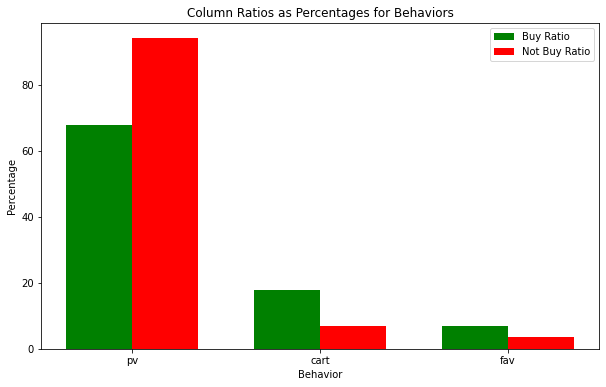

In [29]:
column_ratios = pd.DataFrame(index=behaviors, columns=['Buy Ratio', 'Not Buy Ratio'])

for behavior in behaviors:
    contingency_table = pd.crosstab(df[behavior], df['buy'])
    ratio = contingency_table.div(contingency_table.sum()).loc[1]
    column_ratios.loc[behavior] = [ratio[1], ratio[0]]

# Convert ratios to percentages
column_ratios = column_ratios.astype(float) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(behaviors))

for i, behavior in enumerate(behaviors):
    ax.bar(index[i] - bar_width/2, column_ratios.loc[behavior, 'Buy Ratio'], bar_width, label='Buy Ratio' if i == 0 else "", color='green')
    ax.bar(index[i] + bar_width/2, column_ratios.loc[behavior, 'Not Buy Ratio'], bar_width, label='Not Buy Ratio' if i == 0 else "", color='red')

ax.set_xlabel('Behavior')
ax.set_ylabel('Percentage')
ax.set_title('Column Ratios as Percentages for Behaviors')
ax.set_xticks(index)
ax.set_xticklabels(behaviors)
ax.legend()

plt.show()